In [12]:
import SimpleITK as sitk
import vtk
from tabulate import tabulate
import matplotlib.pyplot as plt

In [2]:
dicom_dir = 'Input_data'

In [3]:
series_reader = sitk.ImageSeriesReader()
dicom_names = series_reader.GetGDCMSeriesFileNames(dicom_dir)
series_reader.SetFileNames(dicom_names)
series_reader.MetaDataDictionaryArrayUpdateOn()
series_reader.LoadPrivateTagsOn()

In [4]:
image = series_reader.Execute()

In [5]:
dicom_id = {"0010|0010": "Patient Name", "0010|0020": "Patient ID", "0010|0030" : "Patient Birth date" , "0010|0040" : "Patient Sex", "0018|0015": "Body Part Examined"}

In [7]:
slice_no = 4
data = []

for key, value in dicom_id.items():
    data.append([value, series_reader.GetMetaData(slice_no, key)])

headers = ['Value', 'MetaData']
print(tabulate(data, headers=headers, tablefmt='grid'))

+--------------------+-----------------+
| Value              | MetaData        |
+====================+=================+
| Patient Name       | L067_FD_3_SHARP |
+--------------------+-----------------+
| Patient ID         | Anonymous       |
+--------------------+-----------------+
| Patient Birth date |                 |
+--------------------+-----------------+
| Patient Sex        | O               |
+--------------------+-----------------+
| Body Part Examined | ABDOMEN         |
+--------------------+-----------------+


In [9]:
reader = sitk.ImageSeriesReader()
dicom_series = reader.GetGDCMSeriesFileNames(dicom_dir)
print(dicom_series)

('Input_data\\L067_FD_3_SHARP_1.CT.0001.0224.2016.01.21.18.11.09.534560.404628281.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0223.2016.01.21.18.11.09.534560.404628257.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0222.2016.01.21.18.11.09.534560.404628233.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0221.2016.01.21.18.11.09.534560.404628209.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0220.2016.01.21.18.11.09.534560.404628185.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0219.2016.01.21.18.11.09.534560.404628161.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0218.2016.01.21.18.11.09.534560.404628137.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0217.2016.01.21.18.11.09.534560.404628113.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0216.2016.01.21.18.11.09.534560.404628089.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0215.2016.01.21.18.11.09.534560.404628065.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.0214.2016.01.21.18.11.09.534560.404628041.IMA', 'Input_data\\L067_FD_3_SHARP_1.CT.0001.021

In [10]:
image = sitk.ReadImage(dicom_series)
image_array = sitk.GetArrayFromImage(image)
image_array.shape

(224, 512, 512)

In [11]:
bone_min_intensity = 300  
bone_max_intensity = 1017  

threshold_value = 400  
thresholded_image = sitk.BinaryThreshold(image, lowerThreshold=threshold_value, upperThreshold=1017, insideValue=1, outsideValue=0)

numpy_array = sitk.GetArrayFromImage(thresholded_image)

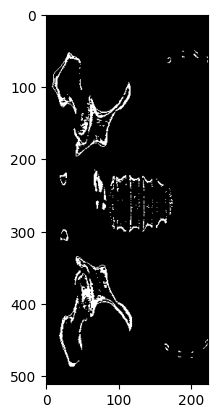

In [13]:
plt.imshow(numpy_array[:, 256, :].T, cmap='gray')  # Assuming you want to visualize the middle slice
plt.show()

In [14]:
PathDicom = "Input_data"
reader = vtk.vtkDICOMImageReader()
reader.SetDirectoryName(PathDicom)
reader.Update()

_extent = reader.GetDataExtent()
ConstPixelDims = [_extent[1]-_extent[0]+1, _extent[3]-_extent[2]+1, _extent[5]-_extent[4]+1]
ConstPixelSpacing = reader.GetPixelSpacing()

In [15]:
threshold = vtk.vtkImageThreshold ()
threshold.SetInputConnection(reader.GetOutputPort())
threshold.ThresholdByLower(400)  
threshold.ReplaceInOn()
threshold.SetInValue(0)  
threshold.ReplaceOutOn()
threshold.SetOutValue(1)  
threshold.Update()

In [16]:
dmc = vtk.vtkDiscreteMarchingCubes()
dmc.SetInputConnection(threshold.GetOutputPort())
dmc.GenerateValues(1, 1, 1)
dmc.Update()

In [17]:
writer = vtk.vtkSTLWriter()
writer.SetInputConnection(dmc.GetOutputPort())
writer.SetFileTypeToBinary()
writer.SetFileName("bones.stl")
writer.Write()

1